In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from numpy import loadtxt
from pandas import read_csv
from xgboost import XGBClassifier
import lightgbm as lgb
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
categorical_features = df.describe(include=["object",'category']).columns
numerical_features = df.describe(include=["int64","float64"]).columns

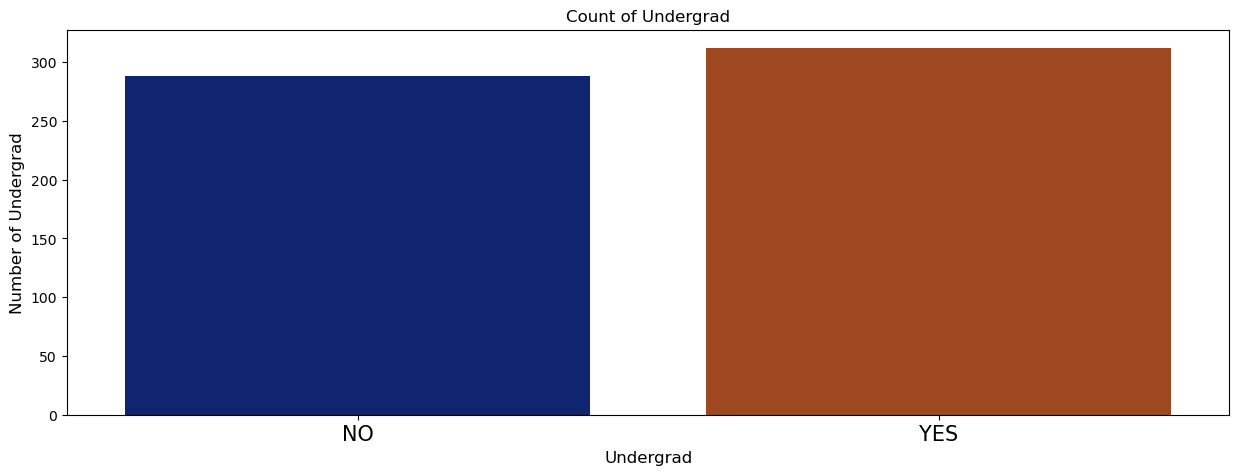

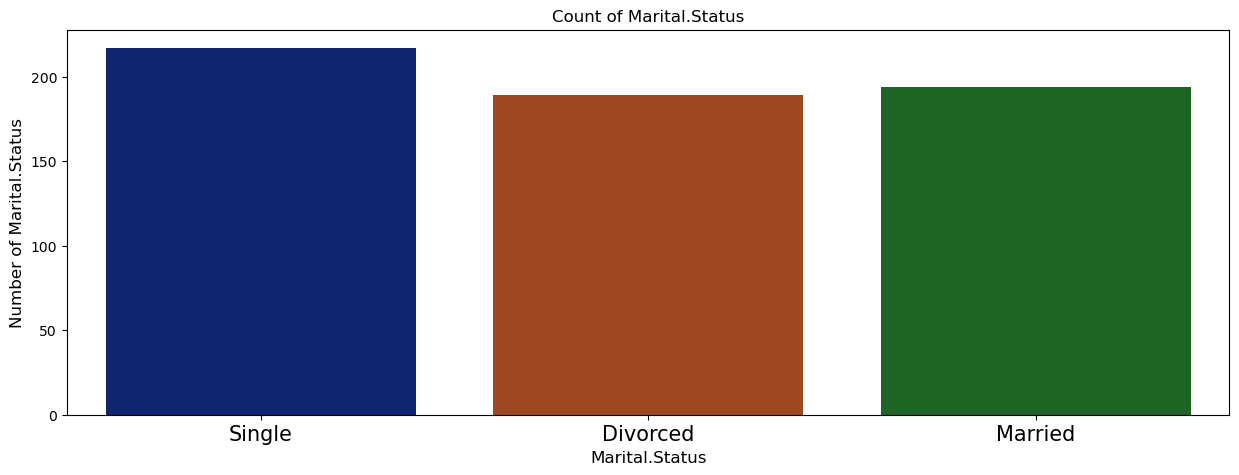

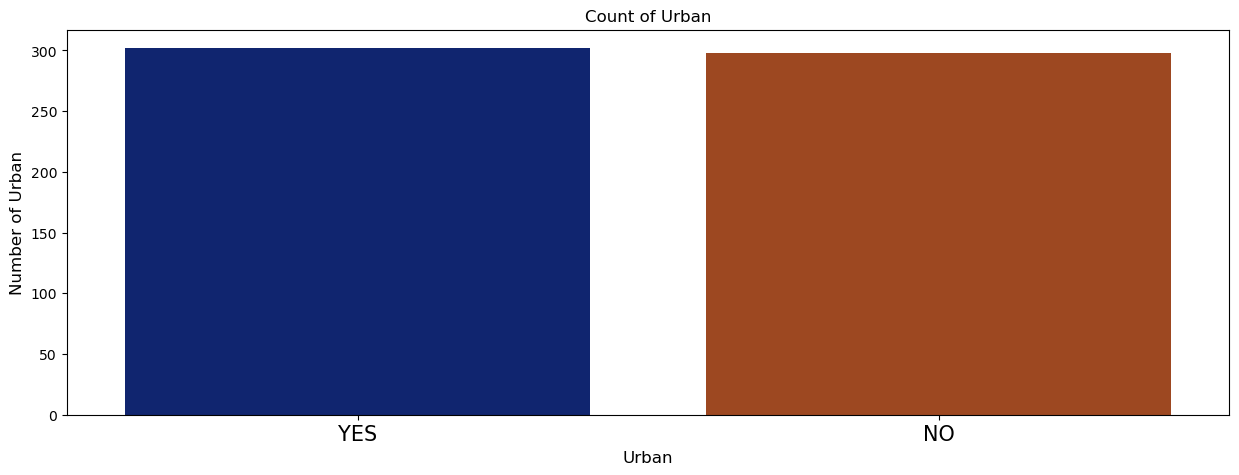

In [7]:
for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    unique = df[column].value_counts(ascending=True);
 
    #plt.subplot(1, len(categorical_features), idx+1)    
    plt.title("Count of "+ column)
    sns.countplot(data=df, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 0, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

<Axes: >

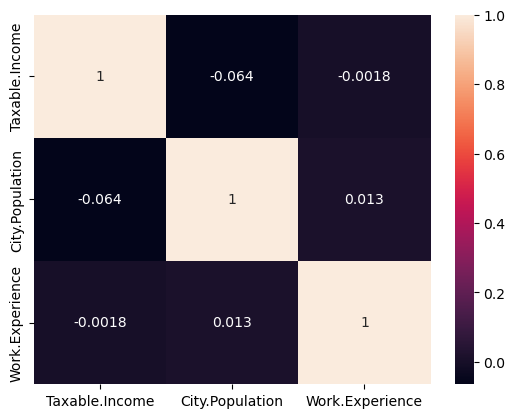

In [8]:
sns.heatmap(df.corr(), annot= True)

In [9]:
df_1 = pd.get_dummies(df, columns=["Undergrad", 'Marital.Status', 'Urban'], drop_first=True)
df_1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [10]:
df_1.shape

(600, 7)

In [11]:
df_1["Fraud"] = np.where(df_1['Taxable.Income']<=30000, 0, 1)
df_1 = df_1.drop(columns=["Taxable.Income"], axis = 1)
df_1.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Fraud
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1


In [12]:
df_1.Fraud.value_counts()

1    476
0    124
Name: Fraud, dtype: int64

In [13]:
x = df_1.iloc[:,1:6]
y = df_1.iloc[:,6]

In [14]:
y.sum()

476

In [15]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40, stratify=y)

In [16]:
x_train.shape, x_test.shape ,y_train.shape ,y_test.shape

((480, 5), (120, 5), (480,), (120,))

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [18]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

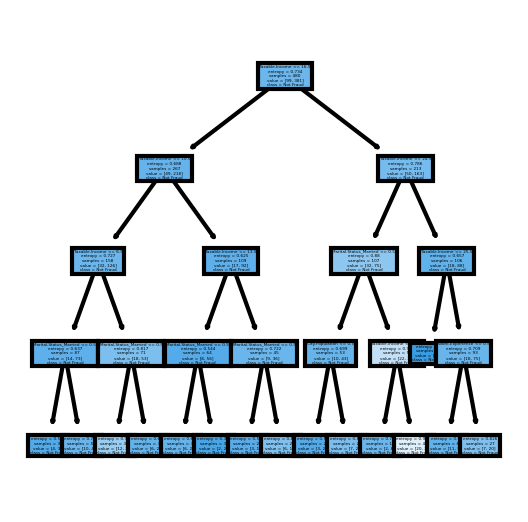

In [19]:
fn=['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES']
cn=['Fraud', 'Not Fraud']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [20]:
preds = model.predict(x_test) # predicting on test data set 
pred_trn = model.predict(x_train)

In [21]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



In [22]:
print(classification_report(y_train,pred_trn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.79      1.00      0.89       381

    accuracy                           0.79       480
   macro avg       0.40      0.50      0.44       480
weighted avg       0.63      0.79      0.70       480



In [23]:
results = cross_val_score(model, x, y, cv=5)
results

array([0.8       , 0.78333333, 0.79166667, 0.79166667, 0.79166667])

The test accuracy obtained is 79%, but the train accuracy is 87% which indicates the possibility of overfitting.

###### Gini criteria

In [24]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [25]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
pred=model.predict(x_test)

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



## Random Forest

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [29]:
model = RandomForestClassifier(n_estimators=100, max_features=3)
result1 = cross_val_score(model, x, y, cv=10)
print(result1.mean())

0.6866666666666668


In [30]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features=3)

In [31]:
preds = model.predict(x_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.11      0.04      0.06        25
           1       0.78      0.92      0.84        95

    accuracy                           0.73       120
   macro avg       0.45      0.48      0.45       120
weighted avg       0.64      0.73      0.68       120



In [32]:
pred_trn = model.predict(x_train)
print(classification_report(y_train,pred_trn))

              precision    recall  f1-score   support

           0       0.89      0.41      0.57        99
           1       0.87      0.99      0.92       381

    accuracy                           0.87       480
   macro avg       0.88      0.70      0.74       480
weighted avg       0.87      0.87      0.85       480



Again there is a difference between test and train accuracy. So hyperparameter tuning is done.

In [33]:
params_grid ={"n_estimators" : [200,400,500,800],
                "max_depth" : [5,7,9],
               "min_samples_leaf" : range(2,10),
               "min_samples_split" : [12,15,18],
               "max_leaf_nodes" : range(6,15) }

dt_estimator = RandomizedSearchCV(RandomForestClassifier(random_state=0), param_distributions=params_grid, cv=10, random_state=0, n_jobs=-1)

dt_estimator.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9],
                                        'max_leaf_nodes': range(6, 15),
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': [12, 15, 18],
                                        'n_estimators': [200, 400, 500, 800]},
                   random_state=0)

In [34]:
dt_estimator.best_params_

{'n_estimators': 400,
 'min_samples_split': 18,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 14,
 'max_depth': 7}

In [35]:
pred1 = dt_estimator.predict(x_test)

In [36]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



In [37]:
pred2 = dt_estimator.predict(x_train)
print(classification_report(y_train,pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.79      1.00      0.89       381

    accuracy                           0.79       480
   macro avg       0.40      0.50      0.44       480
weighted avg       0.63      0.79      0.70       480



The test and train accuracies are matching and hence this is a better solution (one without overfitting).

## Bagging

In [38]:
array = df_1.values
X = array[:,0:6]
Y = array[:,6]

In [39]:
cart = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)

results = cross_val_score(model, X, Y, cv=5)
print(results.mean())

0.7166666666666666


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123, stratify=y)

In [41]:
bg_clf = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)
bg_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=7)

In [42]:
y_pred_test = bg_clf.predict(X_test)

In [43]:
bg_clf.score(X_test, y_test)

0.6916666666666667

In [44]:
tree_train_pred = pd.DataFrame( { 'actual':  y_test,
                            'pred': y_pred_test} )
tree_train_pred

,actual,pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
115,0,1
116,0,1
117,1,1
118,1,1


## ADABoost

In [45]:
model = AdaBoostClassifier(n_estimators=100, random_state=7)

In [46]:
results = cross_val_score(model, X, Y, cv=10)

In [47]:
print(results.mean())

0.7666666666666667


## XGBoost

In [48]:
%matplotlib inline
plt.rcParams['figure.figsize']=25,12
plt.rcParams['axes.grid'] = True
plt.gray()

<Figure size 2500x1200 with 0 Axes>

In [49]:
col_names = df_1.columns

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

In [51]:
model = XGBClassifier(n_estimators=100,max_depth=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [52]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
accuracy

0.9253731343283582

In [53]:
# make predictions for test data
y_pred = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7323232323232324

Due to the huge difference in test and train accuracy, it can be said that there is the problem of overfitting. Hence we need to perform hyperparameter tuning here.

In [54]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
params={ 'n_estimators' : [200,250,400,450,500,600],
        'learning_rate' : [0.0001,0.001,0.01,0.1],
         'max_depth': range(3,14), 
         'colsample_bytree': [0.4,0.5,0.6,0.8]}

xgb_estimator = RandomizedSearchCV(XGBClassifier(), param_distributions=params, cv=5, random_state=0, n_jobs=-1)

xgb_estimator.fit(X_train, y_train)

y_pred1 = xgb_estimator.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print("test accuracy : ", accuracy1)

y_pred2 = xgb_estimator.predict(X_train)
accuracy2 = accuracy_score(y_train, y_pred2)
print("train accuracy : ", accuracy2)

test accuracy :  0.803030303030303
train accuracy :  0.7885572139303483


The test and train accuracy are improved, good and of similar range indicating a good solution.